## DATA SCIENCE AND BUSINESS ANALYTICS INTERN at TSF #GRIPAPRIL21
### By: Teja Karna

## TASK 5: Exploratory Data Analysis - Sports
Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

### Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("matches.csv")
df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [2]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [3]:
df.shape

(756, 18)

In [4]:
print("Total Seasons",len(df['season'].unique()))

Total Seasons 12


In [5]:
pd.concat([df['team1'],df['team2']]).unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

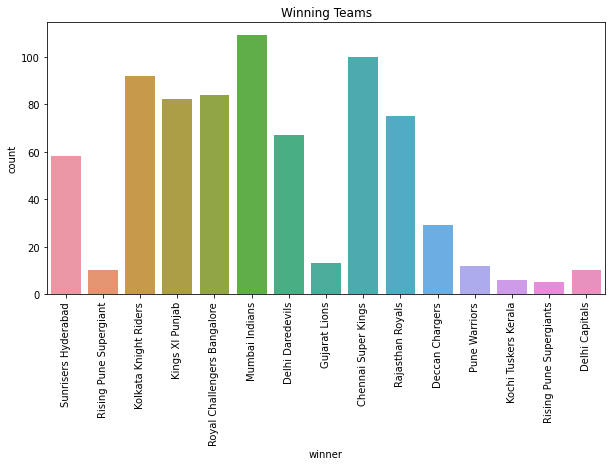

In [6]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'winner', data = df)
plt.title('Winning Teams')
plt.xticks(rotation = 90);

#### Winning by runs

c:\users\hello\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner', ylabel='win_by_runs'>

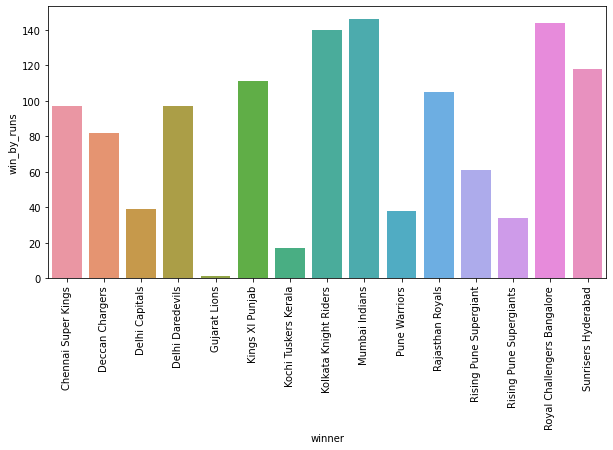

In [7]:
win_max=df.groupby(['winner'],as_index=False)['win_by_runs'].max()
plt.subplots(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(win_max['winner'],win_max['win_by_runs'])

#### Most MOM

In [8]:
df['player_of_match'].value_counts()[0:5]

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

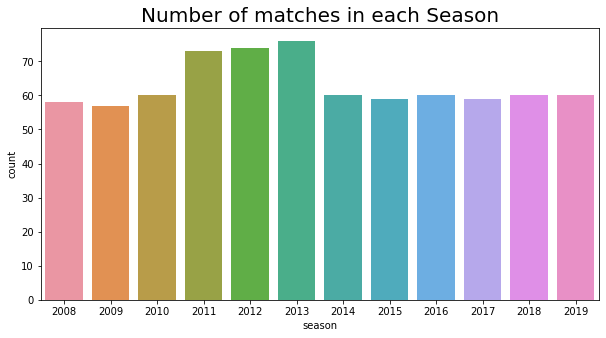

In [9]:
plt.subplots(figsize=(10,5))
sns.countplot(x = df['season'].sort_values())
plt.title('Number of matches in each Season', fontsize = 20)
plt.show()

#### Toss 

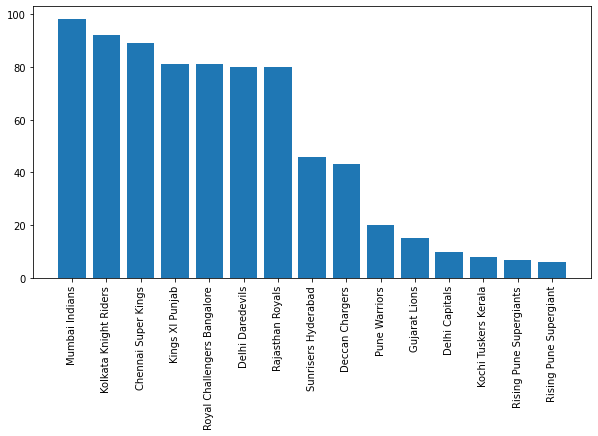

In [10]:
plt.figure(figsize=(10,5))
plt.bar(list(df['toss_winner'].value_counts().keys()),list(df['toss_winner'].value_counts()))
plt.xticks(rotation = 90)
plt.show()

#### Comparing Toss Descisions

c:\users\hello\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


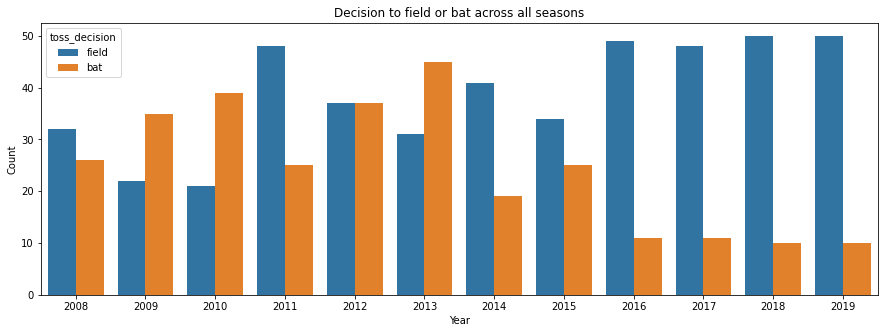

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(df['season'].sort_values(), hue = df['toss_decision'])
plt.title("Decision to field or bat across all seasons")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

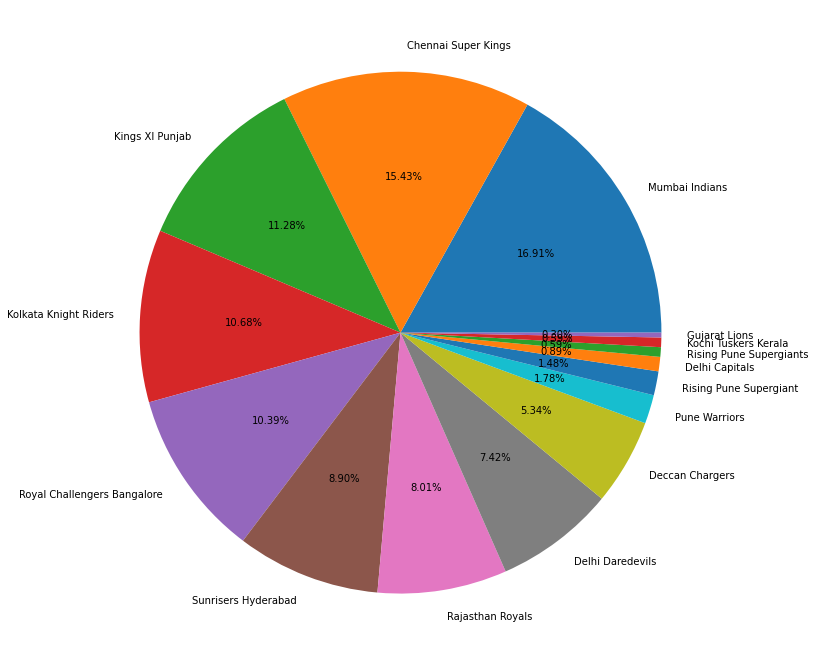

In [12]:
### When a team wins after batting on first position

batting_first = df[df['win_by_runs']!=0]
plt.figure(figsize=(12,12))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys())
        ,autopct='%0.2f%%')
plt.show()

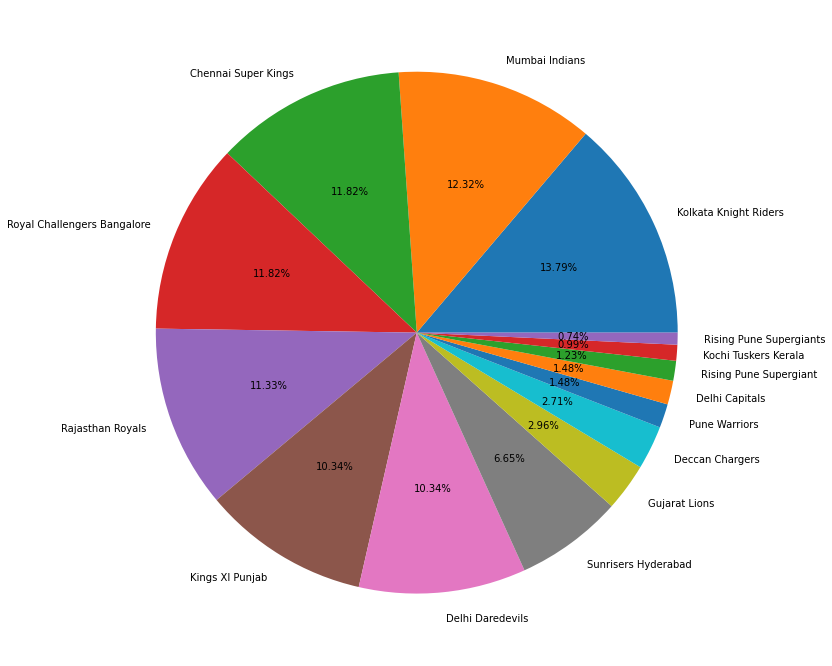

In [13]:
### When a team wins after batting on second position

batting_second = df[df['win_by_wickets']!=0]
plt.figure(figsize = (12,12))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys())
        ,autopct = '%0.2f%%')
plt.show()

### Match Venues

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Eden Gardens'),
  Text(1, 0, 'M Chinnaswamy Stadium'),
  Text(2, 0, 'Wankhede Stadium'),
  Text(3, 0, 'Feroz Shah Kotla'),
  Text(4, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(5, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(6, 0, 'Sawai Mansingh Stadium'),
  Text(7, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(8, 0, 'Maharashtra Cricket Association Stadium'),
  Text(9, 0, 'Dr DY Patil Sports Academy'),
  Text(10, 0, 'Subrata Roy Sahara Stadium'),
  Text(11, 0, 'Kingsmead'),
  Text(12, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
  Text(13, 0, 'Sardar Patel Stadium, Motera'),
  Text(14, 0, 'SuperSport Park'),
  Text(15, 0, 'Brabourne Stadium'),
  Text(16, 0, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
  Text(17, 0, 'Saurashtra Cricket

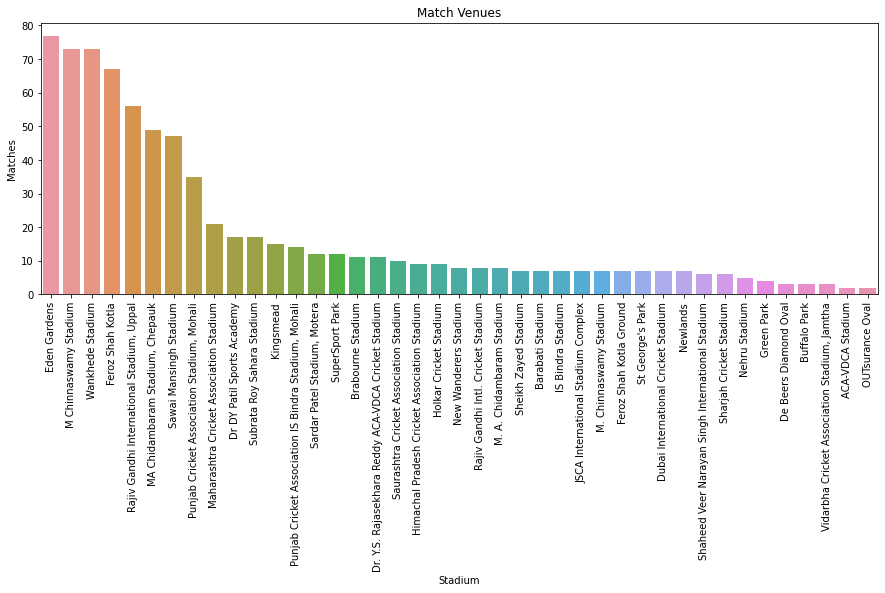

In [14]:
plt.subplots(figsize=(15,5))
sns.countplot(x ='venue',data = df,order = df['venue'].value_counts().index)
plt.title('Match Venues')
plt.xlabel('Stadium')
plt.ylabel('Matches')
plt.xticks(rotation = 90)

(179078, 21)
Total matches where Super over was and wasn't played:  0    178997
1        81
Name: is_super_over, dtype: int64

total overall runs given by Extra:  12004

Total runs given by no balls:  749

Total dismissals of all players over the years:  8834



(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'caught and bowled'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

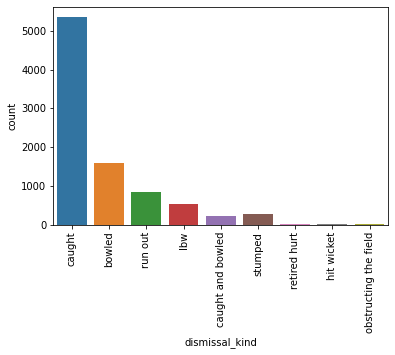

In [15]:
df1 = pd.read_csv('deliveries.csv')
print(df1.shape)

### Total matches where Super over was and wasn't played
print("Total matches where Super over was and wasn't played: ",df1['is_super_over'].value_counts())
print()

### total overall runs given by Extra
print("total overall runs given by Extra: ",sum(df1['extra_runs']))
print()

#### Total runs given by no balls
print("Total runs given by no balls: ",sum(df1['noball_runs']))
print()

#### Total dismissals of all players over the years
print("Total dismissals of all players over the years: ",sum(df1['player_dismissed'].value_counts()))
print()

### Kind of dismissals
sns.countplot(x = df1['dismissal_kind'], data = df1)
plt.xticks(rotation = 90)

### Conclusion:
Most successful Teams : Mumbai Indians and Chennai Super Kings.

Best players till now: Chris Gayle and Ab de Villers.

Most Matches Played at Eden Gardens

## Task5: Completed Exploratory Data Analysis - Sports #GRIPAPRIL21
### The Sparks Foundation